# Module 1 Comparison Plots: GAEZv5 vs PyAEZv2.2_MOD1parallel

Date: 31 JAN 2024

<u>Model Inputs</u>
- /work/hpc/datasets/un_fao/gaez_v5/clim/AgERA5/Hist/variable/Variable_AgERA5_Hist_8100_5m.px
- /work/hpc/datasets/un_fao/gaez_v5/land/ALOSmask5m_fill.rst,.RDC
- /work/hpc/datasets/un_fao/gaez_v5/land/ALOSdem5m_fill.rst,.RDC
- /work/hpc/datasets/un_fao/pyaez/global_static/soil_terrain_lulc_global_08333.tif

<u>Data Preparations Scripts</u>
- /work/hpc/users/kerrie/UN_FAO/repos/pyAEZ_data_prep/global/hpc_shell_workflow/pxv_to_pyaez.sh

<u>Model Outputs</u>
- gaez: /work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/\*8100\*
- pyaez: /work/hpc/datasets/un_fao/pyaez/outputs/8100_GLOBAL/v2.2_MOD1parallel/



In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import xarray as xr
import glob
import numpy as np

In [3]:
year='8100'

gaezresdir= '/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/'                      # gaez results dir
# ppyresdir='/work/hpc/datasets/un_fao/pyaez/outputs/'+year+'_GLOBAL/v2.2_MOD1parallel/'  # parallel pyaez results dir for global
ppyresdir='/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/'  # parallel pyaez results dir for global

varinfo={'ThermalClimate':{'gaez':'mcl','pyaez':'ThermalClimate','parvec':'ThermalClimate','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'ThermalZone':{'gaez':'mc2','pyaez':'ThermalZone','parvec':'ThermalZone','cmap':'gist_ncar_r','levels':12,'vmin':0,'vmax':12},
          'LGPt0':{'gaez':'lt1','pyaez':'LGPt0','parvec':'LGPt0','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt5':{'gaez':'lt2','pyaez':'LGPt5','parvec':'LGPt5','cmap':'viridis','vmin':0,'vmax':366},
          'LGPt10':{'gaez':'lt3','pyaez':'LGPt10','parvec':'LGPt10','cmap':'viridis','vmin':0,'vmax':366},
          'Tsum5':{'gaez':'ts2','pyaez':'tsum5','parvec':'tsum5','cmap':'hot_r','vmin':0,'vmax':11000},
          'Tsum10':{'gaez':'ts3','pyaez':'tsum10','parvec':'tsum10','cmap':'hot_r','vmin':0,'vmax':11000},
          'LGP':{'gaez':'lgd','pyaez':'LGP','parvec':'LGP','cmap':'viridis','vmin':0,'vmax':366},
          'LGPEquivalent':{'gaez':'eq1','pyaez':'LGPEquivalent','parvec':'LGPEquivalent','cmap':'viridis','vmin':0,'vmax':366},
          'Multicrop-irr':{'gaez':'mci','pyaez':'multicrop_irr','parvec':'multicrop_irr','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'Multicrop-rain':{'gaez':'mcr','pyaez':'multicrop_rain','parvec':'multicrop_rain','cmap':'gist_ncar_r','levels':9,'vmin':-.2,'vmax':8.4},
          'FrostIndex':{'gaez':'fst','pyaez':'frost_index','parvec':'frost_index','cmap':'tab20b','levels':11,'vmin':-.05,'vmax':1.05},
          'Permafrost':{'gaez':'pfr','pyaez':'permafrost','parvec':'permafrost','cmap':'tab20b','levels':5,'vmin':-.05,'vmax':4.3},
          'Fallow':{'gaez':'tfr','pyaez':'fallow','parvec':'fallow','cmap':'tab10','levels':7,'vmin':-.5,'vmax':6.3},
          'AEZ':{'gaez':'','pyaez':'AEZ','parvec':'AEZ','cmap':'rainbow','levels':59,'vmin':0,'vmax':59}}

## ThermalClimate, ThermalZone / mcl, mc2

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/mcl_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_ThermalClimate.tif


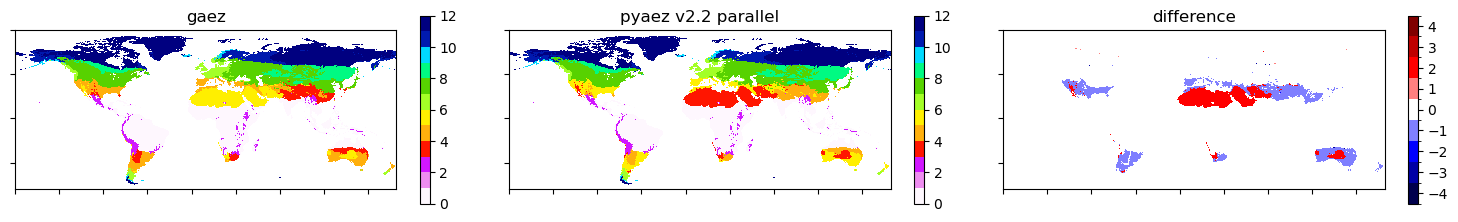

min/max of the gaez-parallel pyaez difference -4.0 4.0
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/mc2_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_ThermalZone.tif


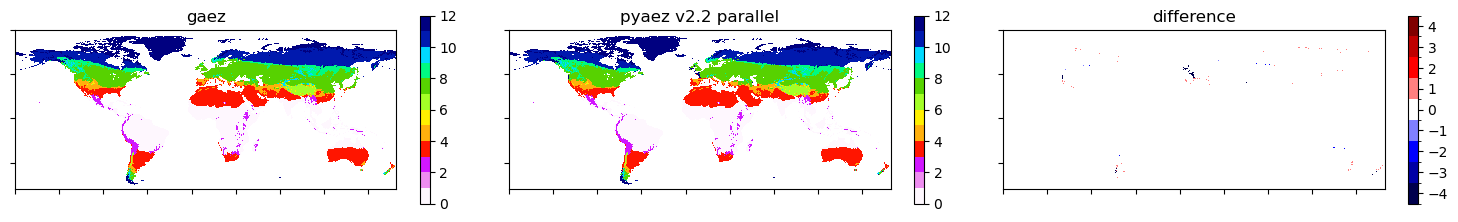

min/max of the gaez-parallel pyaez difference -9.0 4.0
------------------------------------------------------------




In [4]:
keys=['ThermalClimate','ThermalZone']

for key in keys:
    
    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)
    
    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot gaez results global
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel pyaez results global
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # info for difference maps
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]    
        extend='neither'    
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    # gaez-parallel pyaez global difference map
    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    plt.tight_layout()
    plt.show()

    print('min/max of the gaez-parallel pyaez difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')


## LGPt5, LGPt10 / lt2, lt3

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/lt2_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_LGPt5.tif


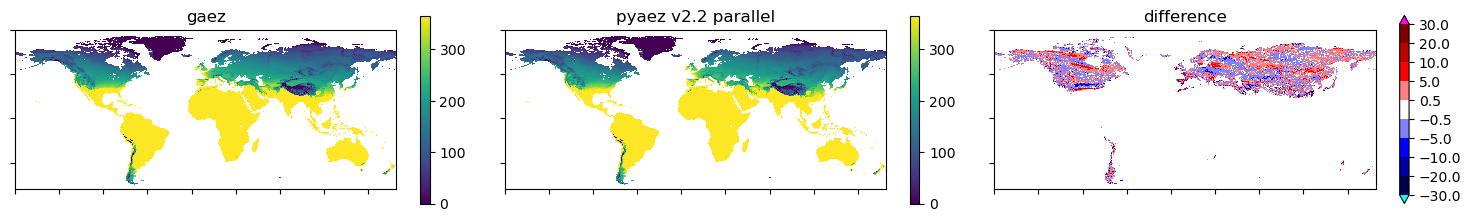

min/max of the repo-parallel difference -55.0 56.0
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/lt3_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_LGPt10.tif


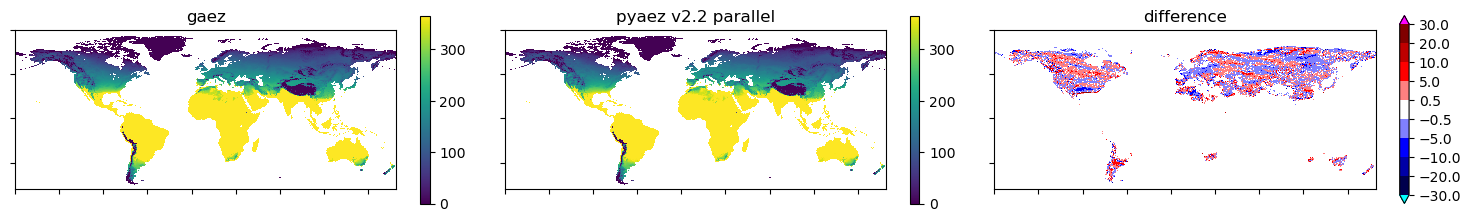

min/max of the repo-parallel difference -44.0 36.0
------------------------------------------------------------




In [5]:
keys=['LGPt5','LGPt10']

for key in keys:

    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)

    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot gaez
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['LGPt0','LGPt5','LGPt10','LGP','LGPEquivalent']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-30,-20,-10,-5,-.5,.5,5,10,20,30]
        ticks=[-30,-20,-10,-5,-.5,.5,5,10,20,30]
        extend='both'
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')  

## Tsum5, Tsum10 / ts2, ts3

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/ts2_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_tsum5.tif


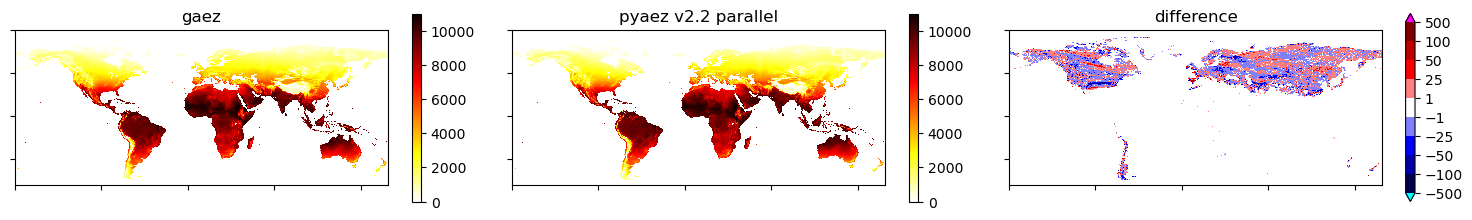

min/max of the repo-parallel difference -649.0 269.0
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/ts3_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_tsum10.tif


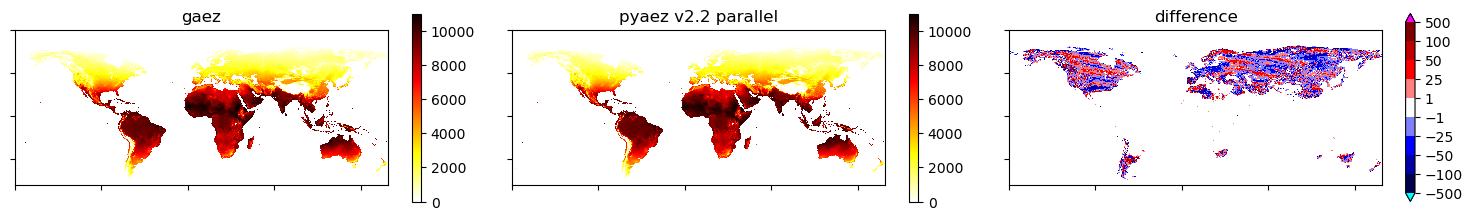

min/max of the repo-parallel difference -833.0 354.0
------------------------------------------------------------




In [6]:
keys=['Tsum5','Tsum10']

for key in keys:

    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)

    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot gaez
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['Tsum5','Tsum10']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-500,-100,-50,-25,-1,1,25,50,100,500]
        ticks=[-500,-100,-50,-25,-1,1,25,50,100,500]
        extend='both' 
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')  

## LGP, LGPEquivalent / lgd, eq1?

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/lgd_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_LGP.tif


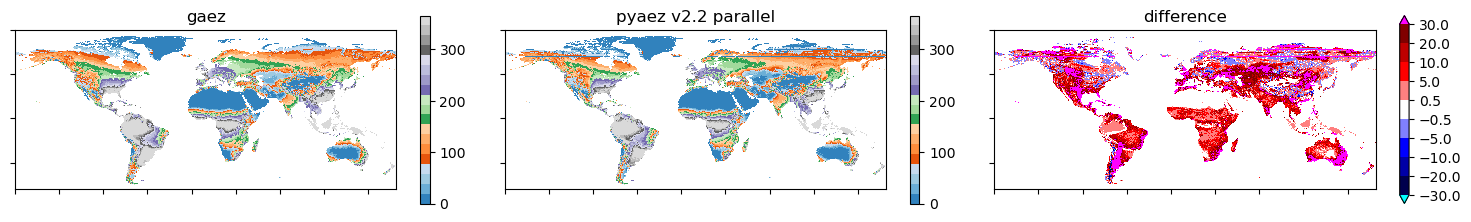

min/max of the repo-parallel difference -201.0 365.0
------------------------------------------------------------




In [7]:
keys=['LGP']#,'LGPEquivalent']

for key in keys:

    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)

    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']
        
    if key == 'LGP':
        cmap=plt.get_cmap('tab20c',19).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
        ticks=[0,20,40,60,80,100,120,140,160,180,200,220,240,260,280,300,320,340,360]
        extend='max'         

    #-------------------------------------------------------
    # plot gaez
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel version results
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # difference map
    if key in ['LGPt0','LGPt5','LGPt10','LGP','LGPEquivalent']:
        cmap=plt.get_cmap('seismic',9).copy()
        cmap.set_extremes(over='magenta',under='cyan')
        bounds=[-30,-20,-10,-5,-.5,.5,5,10,20,30]
        ticks=[-30,-20,-10,-5,-.5,.5,5,10,20,30]
        extend='both'
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 

    plt.tight_layout()
    plt.show()
    
    print('min/max of the repo-parallel difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')  

## Multicrop-irr, Multicrop-rain / mci, mcr

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/mci_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_multicrop_irr.tif


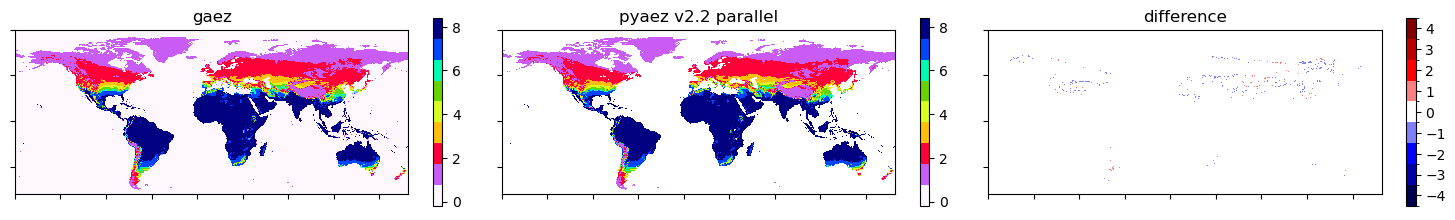

min/max of the gaez-parallel pyaez difference -1.0 1.0
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/mcr_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_multicrop_rain.tif


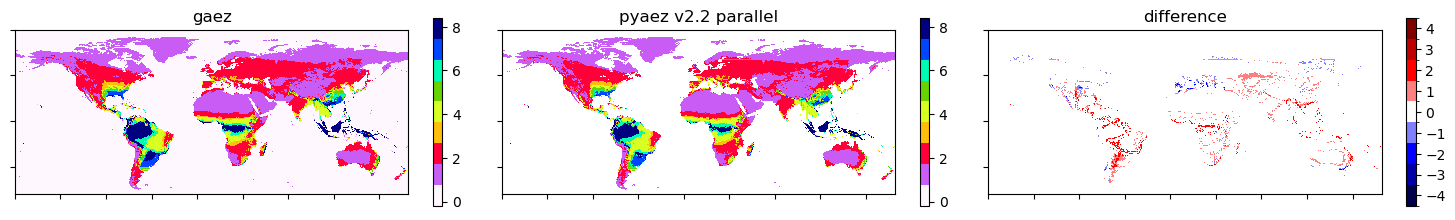

min/max of the gaez-parallel pyaez difference -3.0 5.0
------------------------------------------------------------




In [8]:
keys=['Multicrop-irr','Multicrop-rain']

for key in keys:
    
    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)
    
    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot gaez results global
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel pyaez results global
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # info for difference maps
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]    
        extend='neither'    
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    # gaez-parallel pyaez global difference map
    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    plt.tight_layout()
    plt.show()

    print('min/max of the gaez-parallel pyaez difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')

## FrostIndex, Permafrost, Fallow / fst, pfr, tfr

/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/fst_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_frost_index.tif


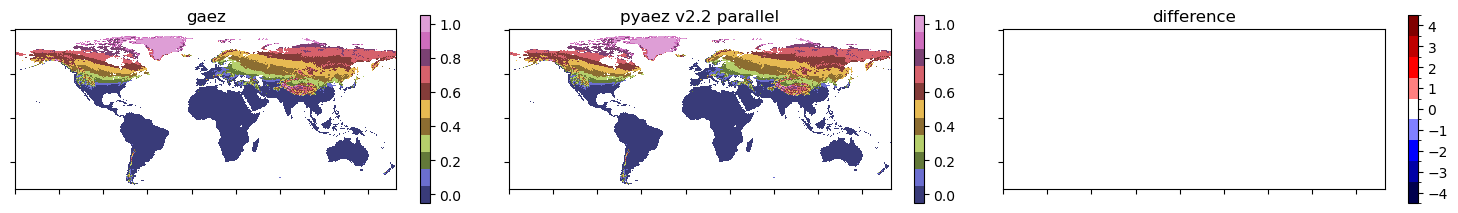

min/max of the gaez-parallel pyaez difference -4.5359135e-05 1.3515353e-05
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/pfr_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_permafrost.tif


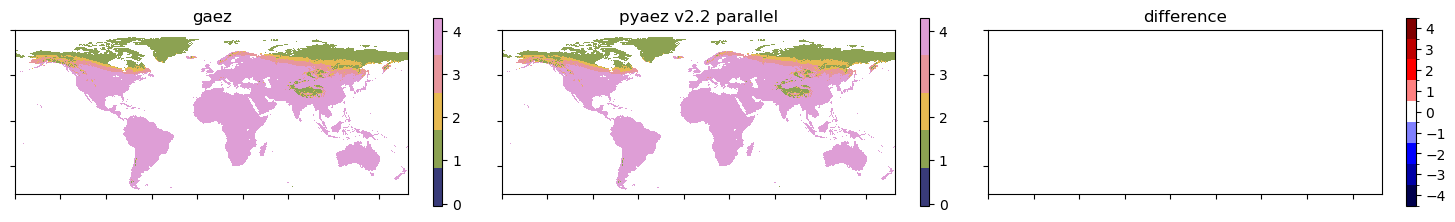

min/max of the gaez-parallel pyaez difference 0.0 0.0
------------------------------------------------------------


/work/hpc/datasets/un_fao/gaez_v5/res01/AgERA5/Hist/tfr_AgERA5_Hist_8100.rst
/work/hpc/users/kerrie/UN_FAO/repos/PyAEZ/data_output/NB1/GLOBAL_fallow.tif


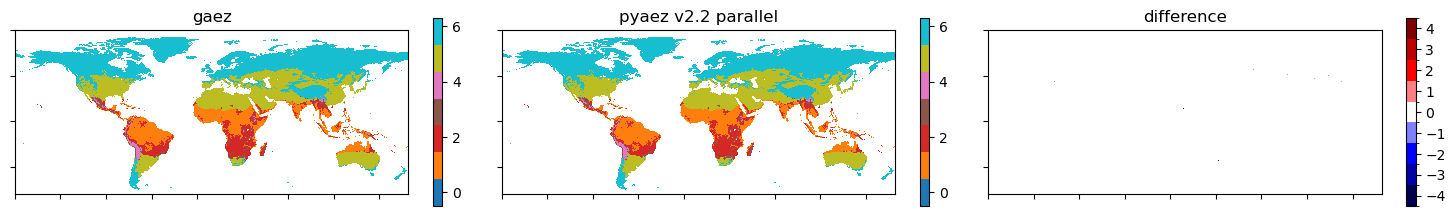

min/max of the gaez-parallel pyaez difference -4.0 4.0
------------------------------------------------------------




In [9]:
keys=['FrostIndex','Permafrost','Fallow']

for key in keys:
    
    gfile=glob.glob(gaezresdir+varinfo[key]['gaez']+'*_'+year+'.rst')[0]
    pfile=glob.glob(ppyresdir+'GLOBAL_'+varinfo[key]['parvec']+'.tif')[0]
    print(gfile)
    print(pfile)
    
    gdata=xr.open_dataset(gfile,engine='rasterio').squeeze().isel(y=slice(0,1800))
    pdata=xr.open_dataset(pfile,engine='rasterio').squeeze()

    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow','AEZ']:
        cmap=plt.get_cmap(varinfo[key]['cmap'], varinfo[key]['levels'])
    else:
        cmap=varinfo[key]['cmap']

    #-------------------------------------------------------
    # plot gaez results global
    plt.figure(figsize=(15,5))
    plt.subplot(1, 3, 1)
    plt.imshow(gdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('gaez')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False)
    #-------------------------------------------------------

    # plot parallel pyaez results global
    plt.subplot(1, 3, 2)
    plt.imshow(pdata.band_data, 
                cmap=cmap,
                vmin=varinfo[key]['vmin'],
                vmax=varinfo[key]['vmax'],
                interpolation='none')
    plt.title('pyaez v2.2 parallel')
    plt.colorbar(shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    #-------------------------------------------------------

    # info for difference maps
    if key in ['ThermalClimate','ThermalZone','Multicrop-irr','Multicrop-rain','FrostIndex','Permafrost','Fallow']:
        cmap=plt.get_cmap('seismic',9).copy()
        bounds=[-4.5,-3.5,-2.5,-1.5,-0.5,.5,1.5,2.5,3.5,4.5]
        ticks=[-4,-3,-2,-1,0,1,2,3,4]    
        extend='neither'    
    norm=colors.BoundaryNorm(bounds,cmap.N)    

    # gaez-parallel pyaez global difference map
    plt.subplot(1, 3, 3)
    plt.imshow(gdata.band_data.data-pdata.band_data.data,
                cmap=cmap,
                norm=norm,
                interpolation='none')
    plt.title('difference')
    plt.colorbar(cmap=cmap,norm=norm,boundaries=bounds,ticks=ticks,extend=extend,shrink=0.4)
    plt.tick_params(labelleft = False , labelbottom = False) 
    plt.tight_layout()
    plt.show()

    print('min/max of the gaez-parallel pyaez difference', np.nanmin(gdata.band_data.data-pdata.band_data.data),np.nanmax(gdata.band_data.data-pdata.band_data.data))
    print('------------------------------------------------------------')
    print('')
    print('')